In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
from pandas import Timestamp
import csv
#from helferlein_thomas import files
#from firesfromSpace import date_seperating 
from scipy.stats import poisson
from scipy.stats import expon
import swifter # swifter is for multiprocessing pandas apply functions
import folium
from IPython.display import HTML, display
from Function_Definitions import *

In [2]:
m6 = pd.read_csv(r'..\Data\Clean\carchive_M6.csv')#.drop(['scan', 'track'],1) #m6archiv

In [3]:
nrtm6 = pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')#.drop(['scan', 'track'],1) #m6nrt

In [4]:
nrtv1 = pd.read_csv(r'..\Data\Clean\carchive_V1.csv')#.drop(['scan', 'track'],1) #v1nrt

In [5]:
v1 = pd.read_csv(r'..\Data\Clean\cnrt_V1.csv')#.drop(['scan', 'track'],1) #v1archive

In [6]:
rain = pd.read_csv(r'..\Data\Clean\rain.csv')

In [7]:
wind = pd.read_csv(r'..\Data\Clean\wind.csv')

In [8]:
weather = pd.read_csv(r'..\Data\Clean\cweather.csv')

In [9]:
import os
os.getcwd()

'D:\\Dokumente\\GitHub\\AustralienFiresFromSpace_Schoeggl_Vorauer\\Notebooks'

In [10]:
#set aqc_date to datetime
weather['acq_date'] = pd.to_datetime(weather['acq_date'])
nrtm6['acq_date'] = pd.to_datetime(nrtm6['acq_date'])
nrtv1['acq_date'] = pd.to_datetime(nrtv1['acq_date'])
v1['acq_date'] = pd.to_datetime(v1['acq_date'])
m6['acq_date'] = pd.to_datetime(m6['acq_date'])
rain['acq_date'] = pd.to_datetime(rain['acq_date'])
wind['acq_date'] = pd.to_datetime(wind['acq_date'])

weather.head()

#rain= datetime(rain) 
#wind= datetime(wind)
#v1= datetime(v1)
#nrtv1= datetime(nrtv1)
#nrtm6= datetime(nrtm6)
#m6= datetime(m6)

acq_date Location  MinTemp  MaxTemp  Rainfall  Evaporation  WindGustDir  \
0 2008-12-01   Albury     13.4     22.9       0.6          0.0        112.5   
1 2008-12-02   Albury      7.4     25.1       0.0          0.0        135.0   
2 2008-12-03   Albury     12.9     25.7       0.0          0.0         67.5   
3 2008-12-04   Albury      9.2     28.0       0.0          0.0        180.0   
4 2008-12-05   Albury     17.5     32.3       1.0          0.0        112.5   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Temp9am  Temp3pm  RainToday  \
0           44.0       112.5       135.0  ...     16.9     21.8      False   
1           44.0       315.0        67.5  ...     17.2     24.3      False   
2           46.0       112.5        67.5  ...     21.0     23.2      False   
3           24.0         0.0       247.5  ...     18.1     26.5      False   
4           41.0       225.0       157.5  ...     17.8     29.7      False   

   RainTomorrow   latitude  longitude  Year  Month  State  season  
0         False -36.080477  146.91628  2008     12    VIC       1  
1         False -36.080477  146.91628  2008     12    VIC       1  
2         False -36.080477  146.91628  2008     12    VIC       1  
3         False -36.080477  146.91628  2008     12    VIC       1  
4         False -36.080477  146.91628  2008     12    VIC       1  

[5 rows x 28 columns]

In [11]:
#call date_separating Function from Function_Definitions
week, month, year = date_separating(weather, 'W M Y')

In [12]:
weekm6, monthm6, yearm6 = date_separating(m6, 'W M Y')

In [13]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude', 'Year',
       'Month', 'State', 'season'],
      dtype='object')

In [14]:
weat_timesel = timeselect(weather, freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm'])

In [15]:
weat_time_temp = timeselect(weather, freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp',])

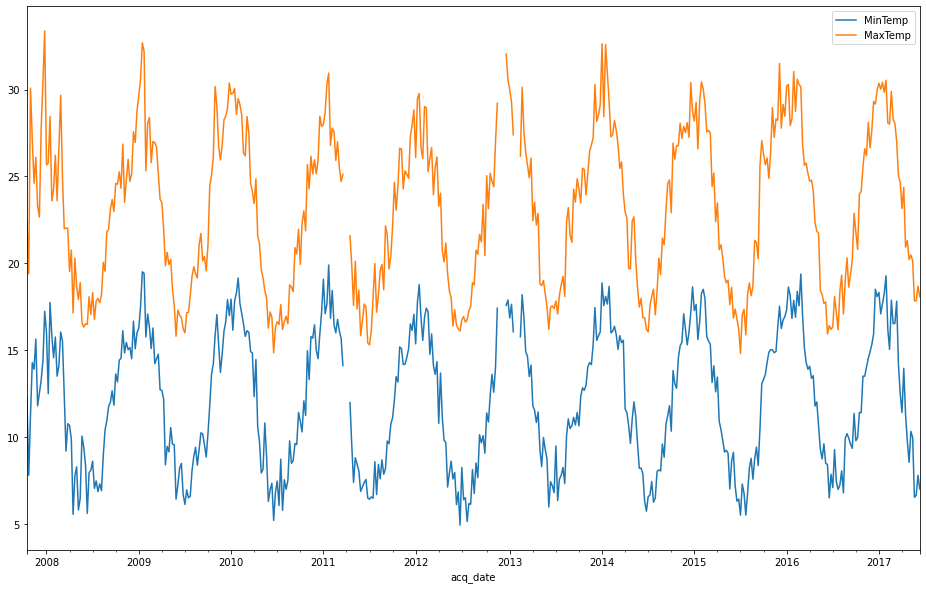

In [16]:
weat_time_temp.set_index('acq_date').plot(figsize=(16,10))

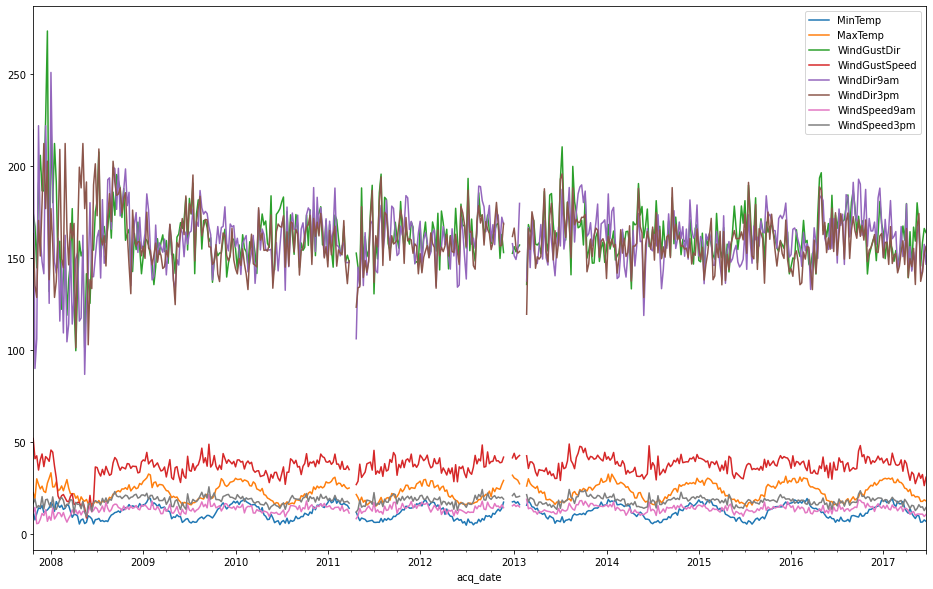

In [17]:
weat_timesel.set_index('acq_date').plot(figsize=(16,10))

In [18]:
#trennt eine woche in tage
weat_weeks_temp = timeselect(week[5], freq='D', fct='mean', columns = ['MinTemp', 'MaxTemp'])

In [19]:
weeksv1, monthsv1, yearsv1 = date_separating(nrtv1, 'W M Y')

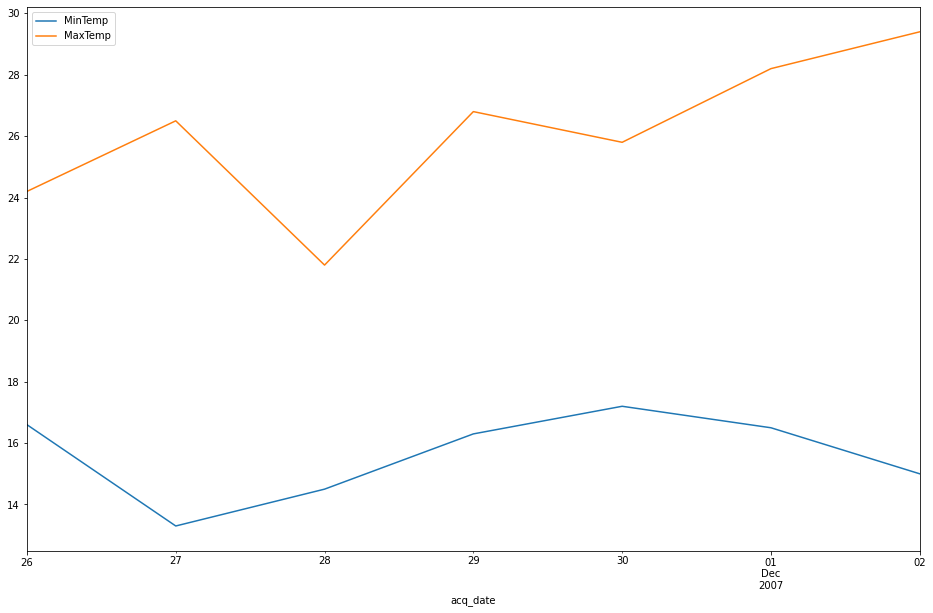

In [20]:
weat_weeks_temp.set_index('acq_date').plot(figsize=(16,10))

In [21]:
#trennt ein jahr in wochen
weat_year_temp = timeselect(year[1], freq='W', fct='mean', columns = ['MinTemp', 'MaxTemp'])

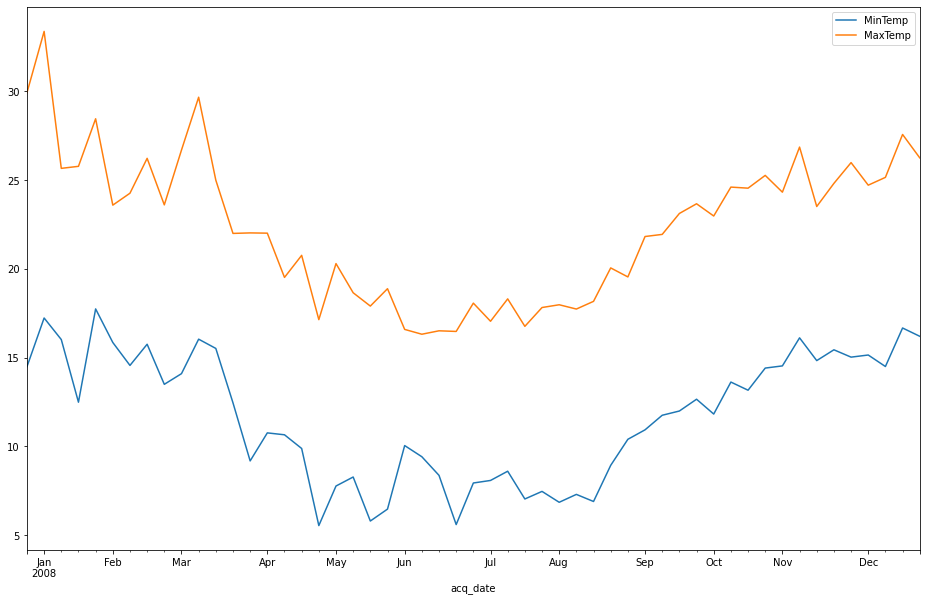

In [22]:
weat_year_temp.set_index('acq_date').plot(figsize=(16,10))

In [23]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude', 'Year',
       'Month', 'State', 'season'],
      dtype='object')

In [24]:
weather.MaxTemp.max()

48.1

plt.plot(weather.set_index('acq_date'))

In [25]:
weather['acq_date'] = pd.to_datetime(weather['acq_date'])
dfww = weather.groupby([pd.Grouper(key='acq_date', freq='D')])[['MaxTemp','WindGustSpeed','WindGustDir']].mean().reset_index().sort_values('acq_date')

In [26]:
dfww

acq_date    MaxTemp  WindGustSpeed  WindGustDir
0    2007-10-18  24.300000      30.000000   157.500000
1    2007-10-19  26.900000      39.000000   225.000000
2    2007-10-20  23.400000      85.000000   157.500000
3    2007-10-21  15.500000      54.000000   157.500000
4    2007-10-22  16.100000      50.000000   337.500000
...         ...        ...            ...          ...
3520 2017-06-07  18.414286      28.795918   155.204082
3521 2017-06-08  17.825000      29.291667   197.812500
3522 2017-06-09  18.102041      33.795918   168.520408
3523 2017-06-10  17.287500      29.812500   127.500000
3524 2017-06-11  16.632500      33.525000   149.062500

[3525 rows x 4 columns]

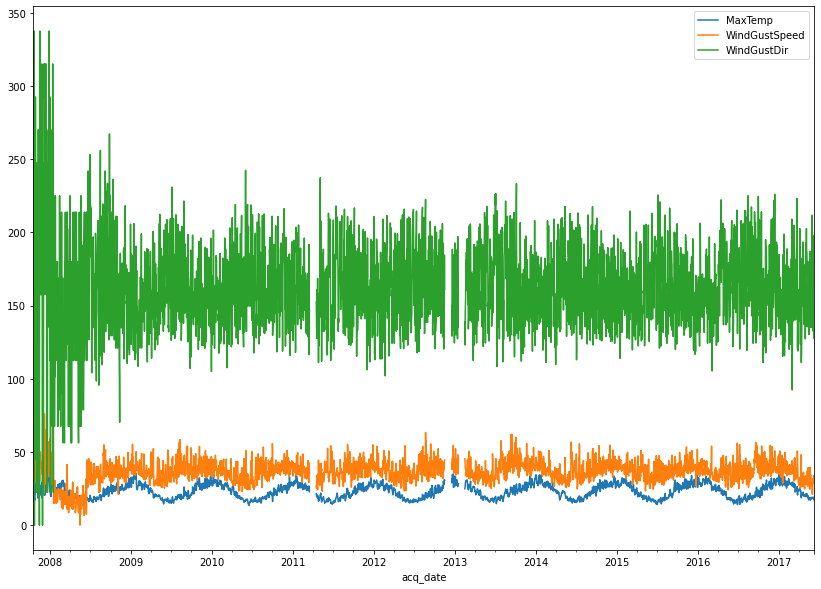

In [27]:
dfww.set_index('acq_date').plot(figsize = (14,10))

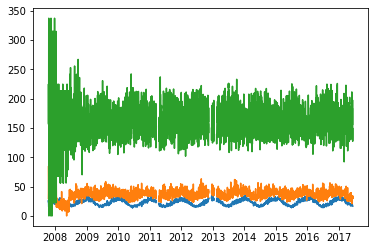

In [28]:
plt.plot(dfww.set_index('acq_date'))

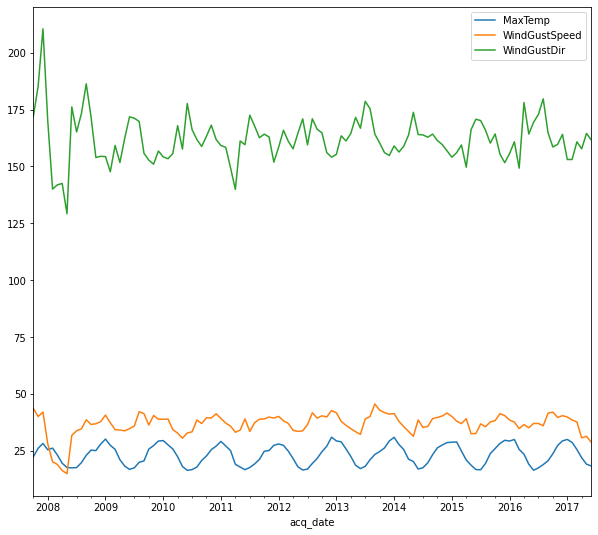

In [29]:
dfwm = weather.groupby([pd.Grouper(key='acq_date', freq='M')])[['MaxTemp','WindGustSpeed','WindGustDir']].mean().reset_index().sort_values('acq_date')
dfwm.set_index('acq_date').plot(figsize = (10,9))

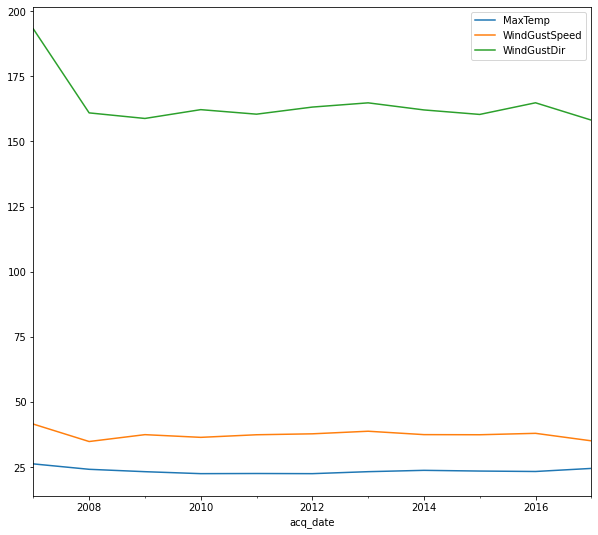

In [30]:
dfwy = weather.groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','WindGustSpeed','WindGustDir']].mean().reset_index().sort_values('acq_date')
dfwy.set_index('acq_date').plot(figsize = (10,9))

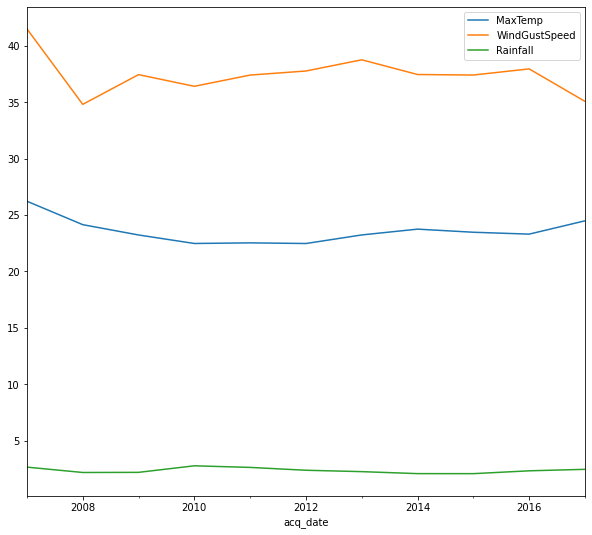

In [31]:
dfwyr = weather.groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','WindGustSpeed','Rainfall']].mean().reset_index().sort_values('acq_date')
dfwyr.set_index('acq_date').plot(figsize = (10,9))

In [32]:
dfwya = weather.groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']].mean().reset_index().sort_values('acq_date')


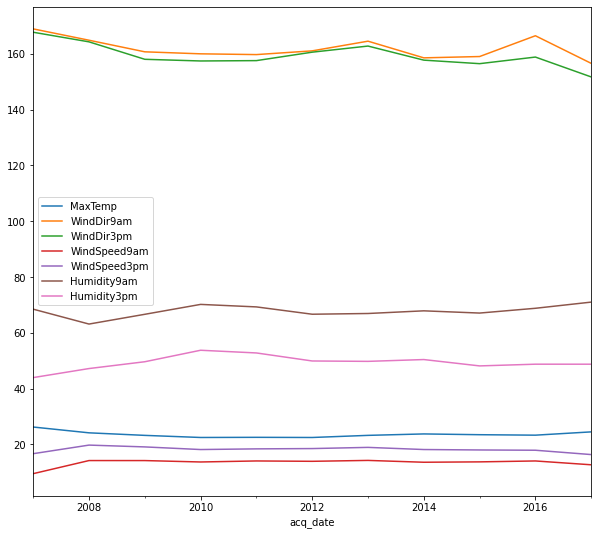

In [33]:
dfwya.set_index('acq_date').plot(figsize = (10,9))

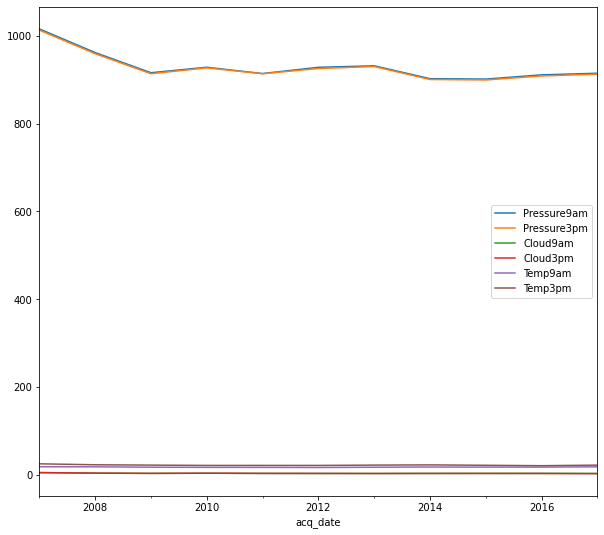

In [34]:
dfwyp = weather.groupby([pd.Grouper(key='acq_date', freq='Y')])[['Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']].mean().reset_index().sort_values('acq_date')
dfwyp.set_index('acq_date').plot(figsize = (10,9))

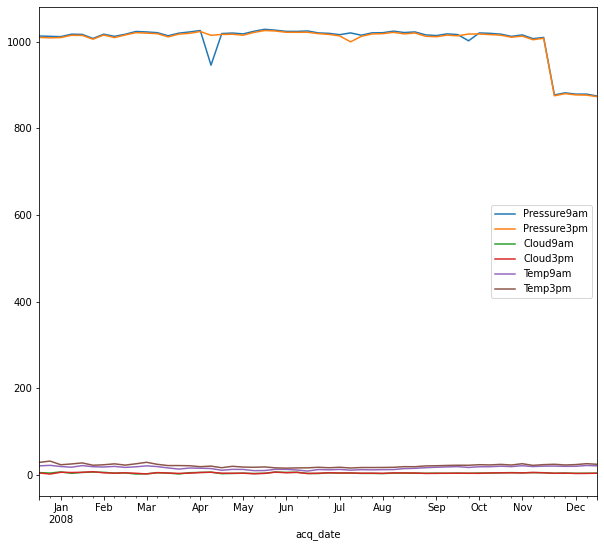

In [35]:
#trennt ein jahr in wochen
wyt = timeselect(year[1], freq='W', fct='mean', columns = ['Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm'])
wyt.set_index('acq_date').plot(figsize = (10,9))

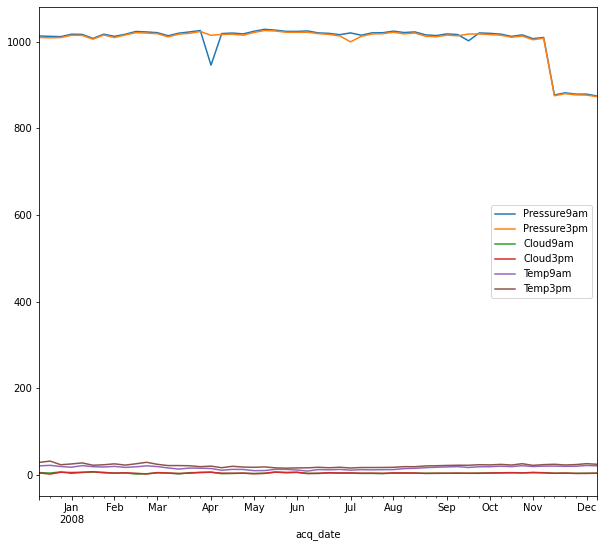

In [36]:
#trennt ein jahr in wochen
wyt = timeselect(year[1], freq='W', fct='mean', columns = ['Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm'])
wyt.set_index('acq_date').plot(figsize = (10,9))

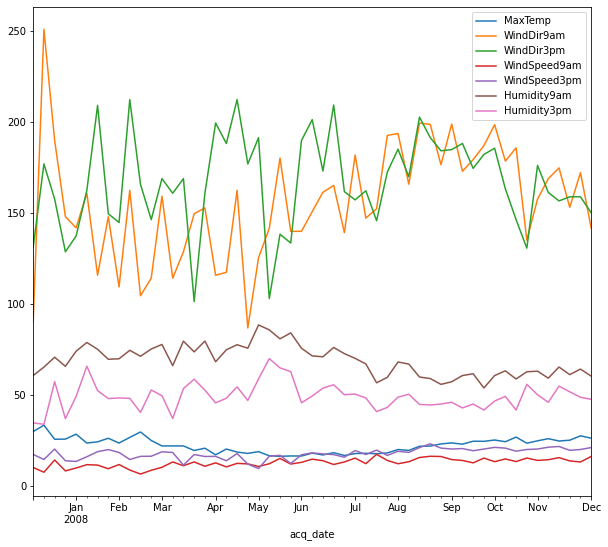

In [37]:
#trennt ein jahr in wochen
wytt = timeselect(year[1], freq='W', fct='mean', columns = ['MaxTemp', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm'])
wytt.set_index('acq_date').plot(figsize = (10,9))


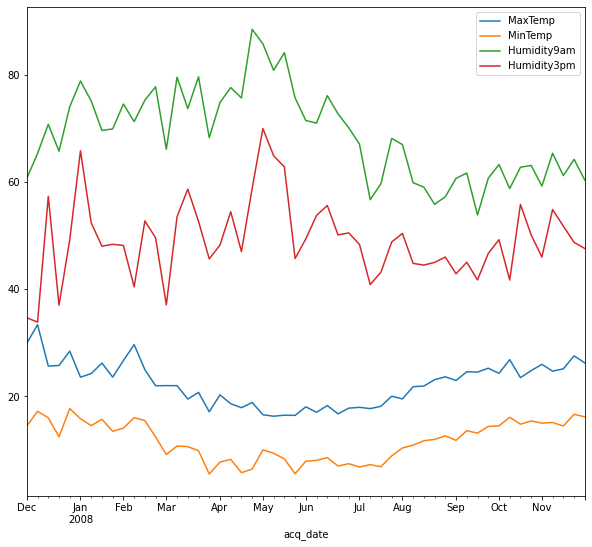

In [38]:
#trennt ein jahr in wochen
wyth = timeselect(year[1], freq='W', fct='mean', columns = ['MaxTemp', 'MinTemp', 'Humidity9am', 'Humidity3pm'])
wyth.set_index('acq_date').plot(figsize = (10,9))

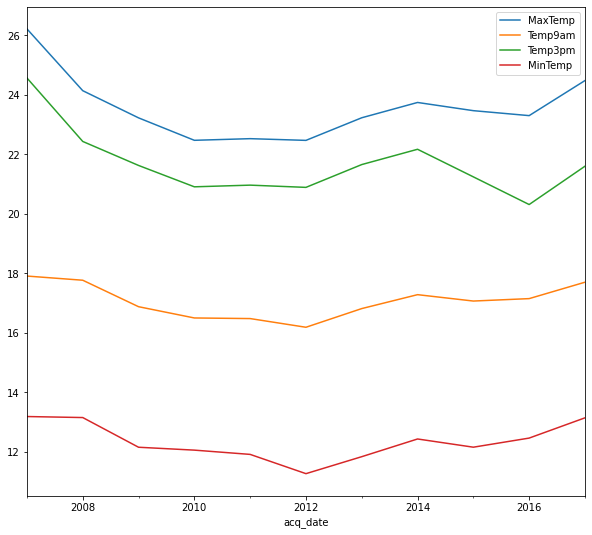

In [39]:
dfwyth = weather.groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']].mean().reset_index().sort_values('acq_date')
dfwyth.set_index('acq_date').plot(figsize = (10,9))

acq_date
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

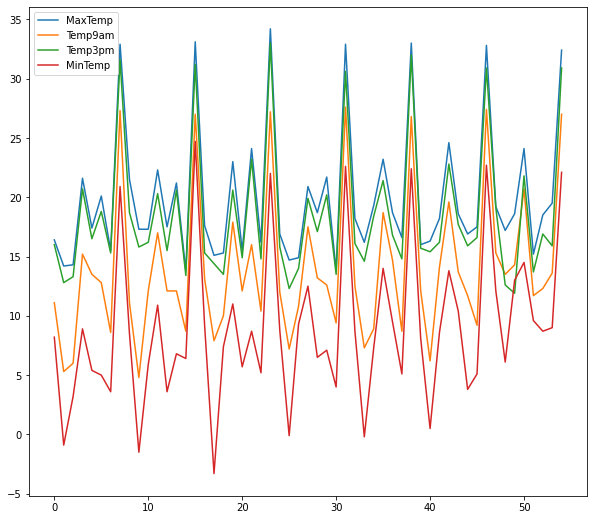

In [40]:
dfwythw = week[43].groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']]
dfwythw.plot(figsize = (10,9))

acq_date
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

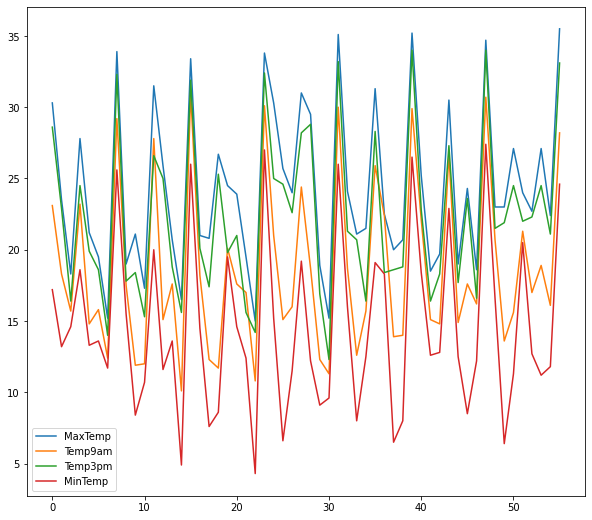

In [41]:
dfwythww = week[53].groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']]
dfwythww.plot(figsize = (10,9))

acq_date
2007-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

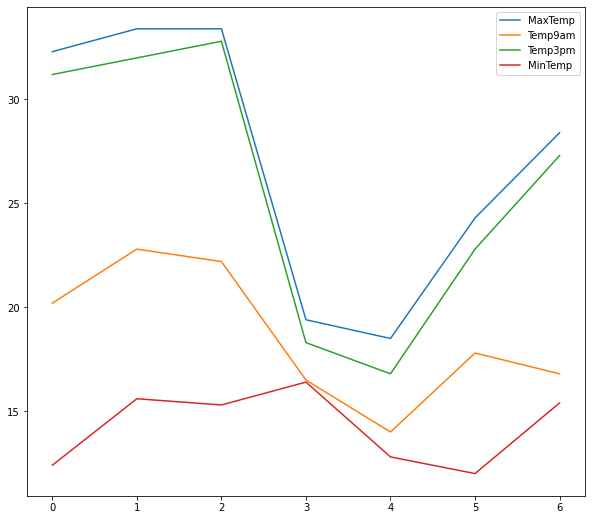

In [42]:
dfwythwa = week[3].groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']]
dfwythwa.plot(figsize = (10,9))

acq_date
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

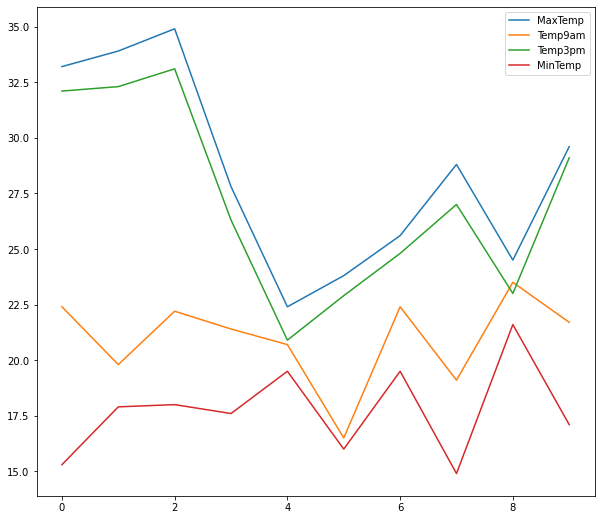

In [43]:
dfwythwad = week[13].groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']]
dfwythwad.plot(figsize = (10,9))

acq_date
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

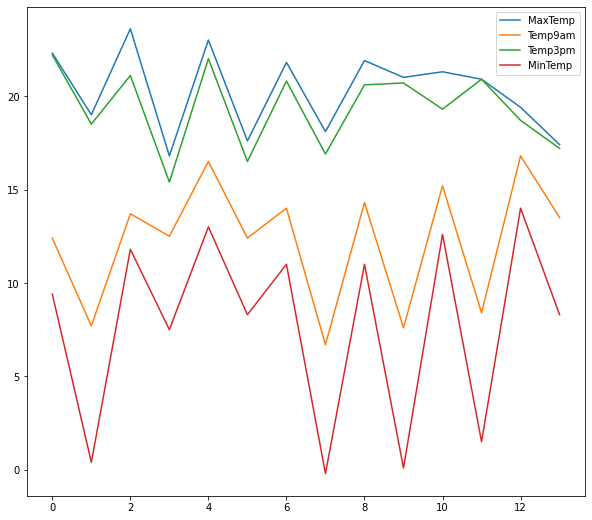

In [44]:
dfwythwada = week[27].groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']]
dfwythwada.plot(figsize = (10,9))

acq_date
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

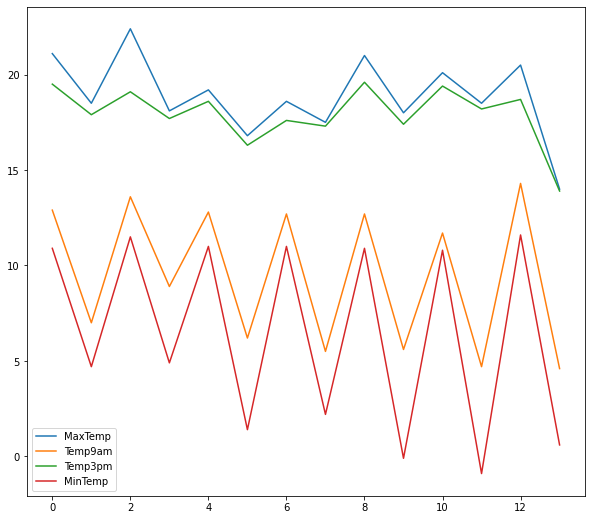

In [45]:
dfwythwadas = week[30].groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp']]
dfwythwadas.plot(figsize = (10,9))

In [46]:
sum(weather.isnull().values.ravel())

0

In [47]:
sum([True for idx,row in weather.iterrows() if any(row.isnull())])

0

In [48]:
weather.isna().sum().sum()

0

In [49]:
#Create a map
#braucht abhängigkeit dass radius sich mit ändert - 2tes tool zur kombination?
f = folium.Figure(width=1000, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,week[42].shape[0]):    
    location=[week[42].iloc[i]['latitude'], week[42].iloc[i]['longitude']]
    folium.CircleMarker(location,radius=4 ,color='blue').add_to(m)

display(m)


In [50]:
weat_weeks_temp

acq_date  MinTemp  MaxTemp
0 2007-11-26     16.6     24.2
1 2007-11-27     13.3     26.5
2 2007-11-28     14.5     21.8
3 2007-11-29     16.3     26.8
4 2007-11-30     17.2     25.8
5 2007-12-01     16.5     28.2
6 2007-12-02     15.0     29.4

In [51]:
week[42]

acq_date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0  2008-08-18     Sydney      5.6     15.8       0.0          3.4   
1  2008-08-18   Canberra     -3.4     12.5       0.0          3.0   
2  2008-08-18  Melbourne      6.7     14.3       0.4          1.4   
3  2008-08-18   Brisbane      8.5     16.9       0.0          3.8   
4  2008-08-18   Adelaide      5.5     14.9       0.0          4.6   
5  2008-08-18      Perth      1.8     22.5       0.0          3.8   
6  2008-08-18     Hobart      1.2     13.5       1.0          0.2   
7  2008-08-18     Darwin     18.1     30.8       0.0          9.2   
8  2008-08-19     Sydney      5.3     17.6       0.6          1.8   
9  2008-08-19   Canberra     -5.3     13.1       0.0          2.2   
10 2008-08-19  Melbourne      6.2     15.2       0.0          2.4   
11 2008-08-19   Brisbane      6.7     20.5       0.0          3.4   
12 2008-08-19   Adelaide      5.5     15.7       0.0          0.8   
13 2008-08-19      Perth      5.5     18.2       0.0          4.0   
14 2008-08-19     Hobart      6.2     17.2       0.0          1.0   
15 2008-08-19     Darwin     17.7     31.3       0.0         10.1   
16 2008-08-20     Sydney      8.2     19.5       0.0          3.8   
17 2008-08-20   Canberra      0.0     14.0       0.0          2.4   
18 2008-08-20  Melbourne      9.7     15.3       0.0          3.0   
19 2008-08-20   Brisbane      7.9     22.1       0.0          2.0   
20 2008-08-20   Adelaide      7.0     17.0       0.0          1.8   
21 2008-08-20      Perth      6.9     17.4       0.2          1.0   
22 2008-08-20     Hobart      4.3     13.1       0.8          2.8   
23 2008-08-20     Darwin     16.3     31.8       0.0          6.8   
24 2008-08-21     Sydney      9.4     20.2       0.0          3.2   
25 2008-08-21   Canberra      2.4     14.1       0.0          3.0   
26 2008-08-21  Melbourne      9.7      9.9       0.0          3.0   
27 2008-08-21   Brisbane      9.3     20.5       0.0          3.2   
28 2008-08-21   Adelaide      8.3     13.4       1.4          2.0   
29 2008-08-21      Perth      8.5     17.6       0.0          4.6   
30 2008-08-21     Hobart      5.5     11.6       0.2          2.0   
31 2008-08-21     Darwin     20.2     33.2       0.0          7.2   
32 2008-08-22     Sydney     10.2     11.9       2.6          3.4   
33 2008-08-22   Canberra     -0.6     12.2       0.0          2.6   
34 2008-08-22  Melbourne      5.9     12.8      14.0          1.0   
35 2008-08-22   Brisbane     11.4     24.9       0.0          1.8   
36 2008-08-22   Adelaide      3.3     12.7       2.0          1.6   
37 2008-08-22      Perth      5.5     19.1       0.0          3.0   
38 2008-08-22     Hobart      1.4     12.7       5.2          2.2   
39 2008-08-22     Darwin     19.4     34.7       0.0          6.6   
40 2008-08-23     Sydney      7.3     14.8      20.8          1.6   
41 2008-08-23   Canberra      2.3     11.6       0.0          5.4   
42 2008-08-23  Melbourne      4.8     14.2       0.6          1.6   
43 2008-08-23   Brisbane      9.8     21.7      10.0          6.2   
44 2008-08-23   Adelaide      3.2     14.1       0.8          0.0   
45 2008-08-23      Perth      3.4     21.4       0.0          4.4   
46 2008-08-23     Hobart      3.3     14.0       0.0          2.4   
47 2008-08-23     Darwin     22.0     31.7       0.0         11.0   
48 2008-08-24     Sydney      5.5     17.3       0.0          3.0   
49 2008-08-24   Canberra     -3.7     14.4       0.0          2.6   
50 2008-08-24  Melbourne      7.4     14.2       0.2          0.8   
51 2008-08-24   Brisbane      7.5     21.6       0.0          3.8   
52 2008-08-24   Adelaide      2.4     15.1       0.0          0.0   
53 2008-08-24      Perth      3.8     21.3       0.0          3.4   
54 2008-08-24     Hobart      4.0     15.5       0.0          2.4   
55 2008-08-24     Darwin     21.1     32.7       0.0          8.6   

    WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Temp9am  T

In [52]:
weather.corr(method ='pearson') 

MinTemp   MaxTemp  Rainfall  Evaporation  WindGustDir  \
MinTemp        1.000000  0.722484  0.102244     0.367894    -0.008936   
MaxTemp        0.722484  1.000000 -0.073387     0.404757     0.048436   
Rainfall       0.102244 -0.073387  1.000000    -0.054656    -0.037557   
Evaporation    0.367894  0.404757 -0.054656     1.000000    -0.008408   
WindGustDir   -0.008936  0.048436 -0.037557    -0.008408     1.000000   
WindGustSpeed  0.130381  0.085229  0.094167     0.127846     0.048822   
WindDir9am     0.042742  0.080099 -0.028432     0.039229     0.171906   
WindDir3pm     0.003350  0.063289 -0.032666    -0.005786     0.301581   
WindSpeed9am   0.181565  0.021062  0.084768     0.169056     0.001468   
WindSpeed3pm   0.173819  0.061310  0.052425     0.126131    -0.007259   
Humidity9am   -0.180448 -0.431386  0.202095    -0.321374    -0.006689   
Humidity3pm   -0.000696 -0.459034  0.226778    -0.253544    -0.008556   
Pressure9am    0.128941  0.099451 -0.004096     0.231382     0.030017   
Pressure3pm    0.127805  0.096821 -0.003443     0.230812     0.028276   
Cloud9am       0.156097 -0.113448  0.149963     0.156225    -0.028013   
Cloud3pm       0.117932 -0.100454  0.126294     0.172650    -0.009775   
Temp9am        0.891762  0.866982  0.009495     0.403547     0.015478   
Temp3pm        0.627278  0.878366 -0.077041     0.367642     0.064280   
RainToday      0.056575 -0.223451  0.501565    -0.111719    -0.063634   
RainTomorrow   0.082019 -0.156267  0.235087    -0.076461     0.004910   
latitude       0.502032  0.439611  0.069316     0.281946    -0.015731   
longitude      0.019380 -0.068547  0.028251    -0.063747     0.025672   
Year           0.039652  0.057434 -0.009394    -0.073132     0.004470   
Month         -0.201391 -0.162344 -0.030623    -0.010935     0.017407   
season        -0.357656 -0.332488 -0.033801    -0.105619     0.026401   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
MinTemp             0.130381    0.042742    0.003350      0.181565   
MaxTemp             0.085229    0.080099    0.063289      0.021062   
Rainfall            0.094167   -0.028432   -0.032666      0.084768   
Evaporation         0.127846    0.039229   -0.005786      0.169056   
WindGustDir         0.048822    0.171906    0.301581      0.001468   
WindGustSpeed       1.000000    0.154153    0.087692      0.527075   
WindDir9am          0.154153    1.000000    0.156593      0.174915   
WindDir3pm          0.087692    0.156593    1.000000      0.007917   
WindSpeed9am        0.527075    0.174915    0.007917      1.000000   
WindSpeed3pm        0.608283    0.112413    0.052597      0.513931   
Humidity9am        -0.167890   -0.064473    0.003190     -0.224094   
Humidity3pm        -0.001323   -0.019680    0.023492     -0.013411   
Pressure9am         0.175633    0.082060    0.075885      0.132073   
Pressure3pm         0.177270    0.077754    0.078883      0.130537   
Cloud9am            0.005053    0.009268   -0.031825      0.101592   
Cloud3pm            0.056200    0.047031    0.000385      0.119961   
Temp9am             0.121758    0.084949    0.025313      0.137988   
Temp3pm             0.113040    0.085383    0.116365      0.023547   
RainToday           0.105933   -0.033487   -0.062195      0.101081   
RainTomorrow        0.165171    0.048858    0.013662      0.088482   
latitude           -0.015459   -0.053962    0.005516      0.059879   
longitude           0.046439   -0.029560    0.020608     -0.015140   
Year                0.008830    0.002280   -0.008358     -0.015395   
Month               0.044511    0.038057    0.027243      0.049084   
season              0.001684    0.026691    0.032652      0.015112   

               WindSpeed3pm  ...  Cloud3pm   Temp9am   Temp3pm  RainToday  \
MinTemp            0.173819  ...  0.117932  0.891762  0.627278   0.056575   
MaxTemp            0.061310  ... -0.100454  0.866982  0.878366  -0.223451   
Rainfall           0.052425  ...  0.126294  0.009495 -0.077041   

In [53]:
weather.corr(method ='kendall') 

MinTemp   MaxTemp  Rainfall  Evaporation  WindGustDir  \
MinTemp        1.000000  0.533287  0.018162     0.234340    -0.010089   
MaxTemp        0.533287  1.000000 -0.221906     0.247279     0.030926   
Rainfall       0.018162 -0.221906  1.000000    -0.094245    -0.053668   
Evaporation    0.234340  0.247279 -0.094245     1.000000    -0.008844   
WindGustDir   -0.010089  0.030926 -0.053668    -0.008844     1.000000   
WindGustSpeed  0.114258  0.070685  0.075225     0.084590     0.012737   
WindDir9am     0.022877  0.044465 -0.026621     0.037726     0.137604   
WindDir3pm    -0.003277  0.038670 -0.050227    -0.003282     0.251645   
WindSpeed9am   0.127661  0.019096  0.063043     0.123953    -0.006462   
WindSpeed3pm   0.123622  0.048131  0.047922     0.106636    -0.010874   
Humidity9am   -0.135276 -0.310980  0.325127    -0.211635    -0.004984   
Humidity3pm    0.014145 -0.308774  0.318106    -0.145360    -0.010602   
Pressure9am   -0.220570 -0.178786 -0.095520     0.011374     0.016519   
Pressure3pm   -0.224199 -0.233751 -0.040388     0.000389    -0.014796   
Cloud9am       0.112971 -0.063958  0.172215     0.260969    -0.022207   
Cloud3pm       0.088787 -0.054447  0.139739     0.272357    -0.007679   
Temp9am        0.724689  0.703878 -0.114267     0.250954     0.007384   
Temp3pm        0.486733  0.873311 -0.221126     0.236681     0.038973   
RainToday      0.042529 -0.186124  0.771850    -0.077145    -0.054005   
RainTomorrow   0.061346 -0.128911  0.296881    -0.051066     0.005490   
latitude       0.322650  0.304133 -0.059575     0.173870    -0.019707   
longitude      0.062011 -0.012068  0.018870    -0.112062     0.006054   
Year           0.027489  0.039140 -0.011939    -0.103553     0.002651   
Month         -0.148274 -0.125447  0.010994    -0.002258     0.015310   
season        -0.274937 -0.260639  0.025498    -0.052128     0.023603   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
MinTemp             0.114258    0.022877   -0.003277      0.127661   
MaxTemp             0.070685    0.044465    0.038670      0.019096   
Rainfall            0.075225   -0.026621   -0.050227      0.063043   
Evaporation         0.084590    0.037726   -0.003282      0.123953   
WindGustDir         0.012737    0.137604    0.251645     -0.006462   
WindGustSpeed       1.000000    0.106289    0.040607      0.424573   
WindDir9am          0.106289    1.000000    0.122138      0.132509   
WindDir3pm          0.040607    0.122138    1.000000      0.001804   
WindSpeed9am        0.424573    0.132509    0.001804      1.000000   
WindSpeed3pm        0.504780    0.077650    0.025499      0.363465   
Humidity9am        -0.148666   -0.051363   -0.000649     -0.187001   
Humidity3pm        -0.030075   -0.015133    0.007382     -0.014696   
Pressure9am        -0.178498   -0.021274    0.023640     -0.067895   
Pressure3pm        -0.154957   -0.039859   -0.007642     -0.040384   
Cloud9am            0.017222    0.013092   -0.024946      0.085719   
Cloud3pm            0.045220    0.038171    0.001419      0.095863   
Temp9am             0.105152    0.048191    0.011928      0.098109   
Temp3pm             0.066095    0.046205    0.064708      0.018275   
RainToday           0.096836   -0.025866   -0.051376      0.080634   
RainTomorrow        0.145041    0.041678    0.011539      0.066423   
latitude           -0.027565   -0.040389   -0.017984      0.062952   
longitude          -0.035216   -0.032219   -0.005136     -0.050315   
Year               -0.002421    0.002233   -0.006323     -0.008900   
Month               0.028404    0.027362    0.021353      0.033423   
season             -0.013679    0.020255    0.026693      0.006329   

               WindSpeed3pm  ...  Cloud3pm   Temp9am   Temp3pm  RainToday  \
MinTemp            0.123622  ...  0.088787  0.724689  0.486733   0.042529   
MaxTemp            0.048131  ... -0.054447  0.703878  0.873311  -0.186124   
Rainfall           0.047922  ...  0.139739 -0.114267 -0.221126   

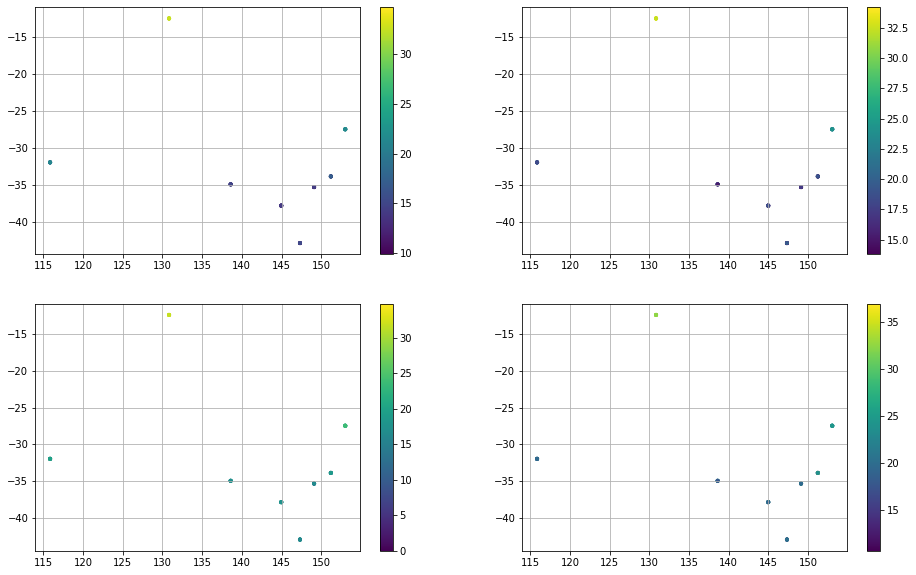

In [54]:
df = weather.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['MaxTemp', 'WindGustSpeed']].mean().reset_index().sort_values('acq_date')

fig, ax = plt.subplots(2,2, num = 'locations', figsize = (16,10))
a = ax.ravel()
for i,j in enumerate(week[42:46]):#hier könnte eine liste von dataframes rein kommen
#ae = achsenelement  
    ae = a[i].scatter(j.longitude, j.latitude, marker = '.' , c = j.MaxTemp)
    fig.colorbar(ae, ax = a[i])
    a[i].grid(True)

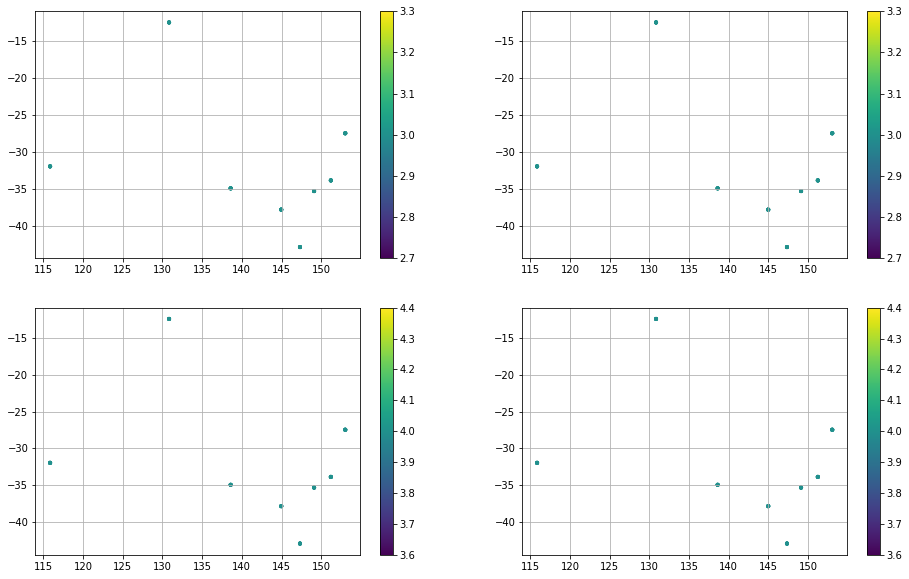

In [55]:
fig, ax = plt.subplots(2,2, num = 'locations', figsize = (16,10))
a = ax.ravel()
for i,j in enumerate(week[42:46]):#hier könnte eine liste von dataframes rein kommen
#ae = achsenelement  
    ae = a[i].scatter(j.longitude, j.latitude, marker = '.' , c = j.season)
    fig.colorbar(ae, ax = a[i])
    a[i].grid(True)

In [71]:
dfb = weather.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['MaxTemp', 'MinTemp', 'Humidity9am','Pressure9am','RainTomorrow']].mean().reset_index().sort_values('acq_date')
dfb.plot(figsize=(10,9))

ValueError: view limit minimum -36824.6 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

acq_date
2007-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2008-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2009-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2010-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2011-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2013-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2016-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, dtype: object

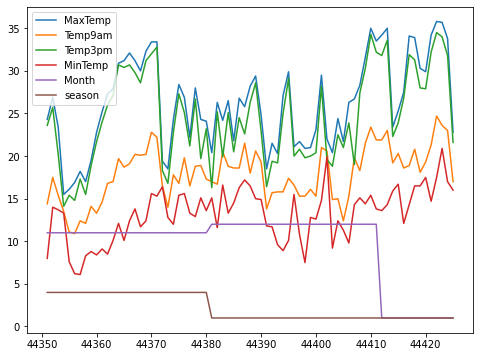

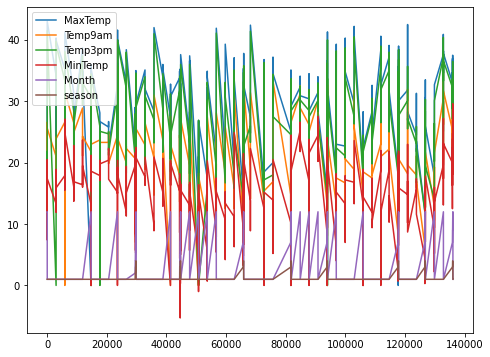

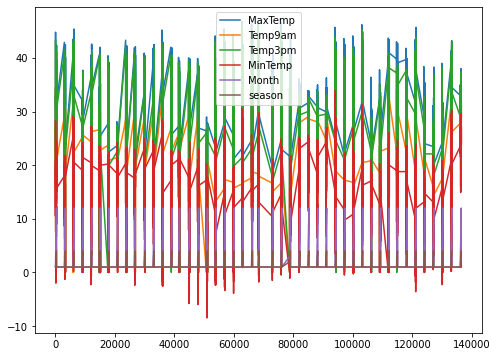

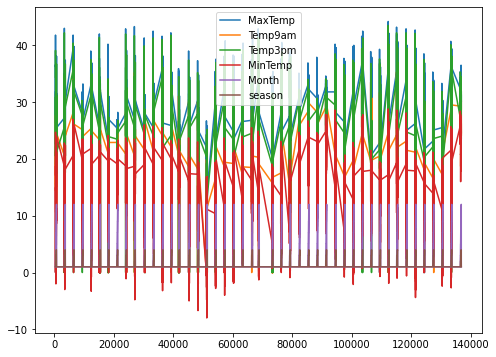

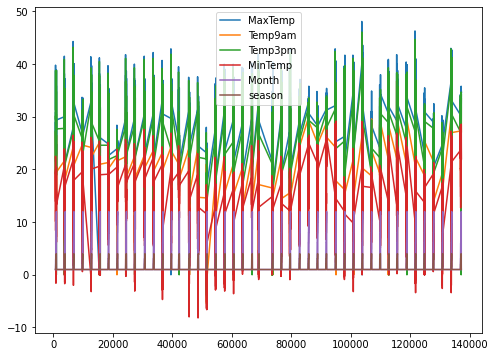

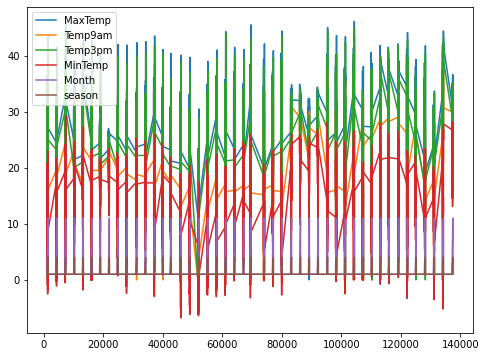

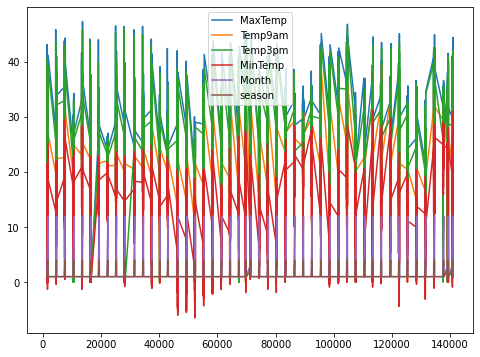

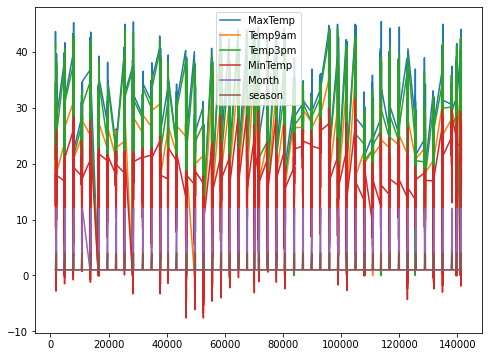

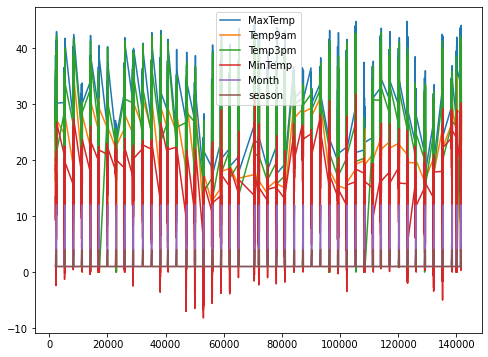

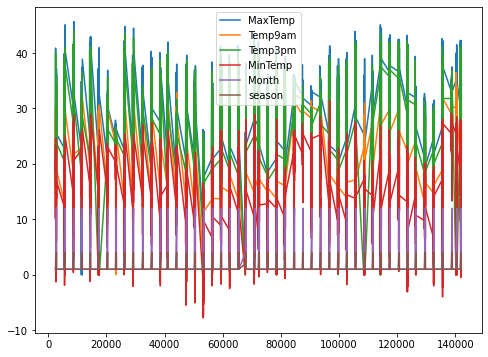

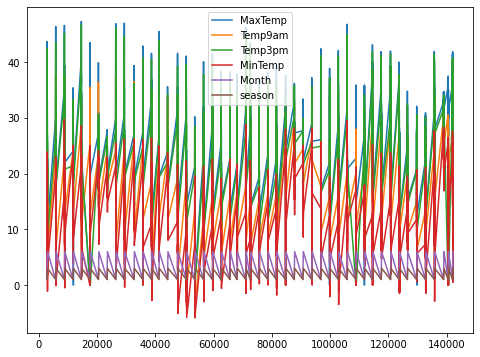

In [57]:
dfWMW = weather.groupby([pd.Grouper(key='acq_date', freq='Y')])[['MaxTemp','Temp9am','Temp3pm','MinTemp','Month','season']]
dfWMW.plot(figsize = (8,6))

In [58]:
weather.corrwith(m6)

latitude         0.178929
longitude       -0.185344
Year             0.029743
Month           -0.003995
season           0.000313
Cloud3pm              NaN
Cloud9am              NaN
Evaporation           NaN
Humidity3pm           NaN
Humidity9am           NaN
MaxTemp               NaN
MinTemp               NaN
Pressure3pm           NaN
Pressure9am           NaN
RainToday             NaN
RainTomorrow          NaN
Rainfall              NaN
Temp3pm               NaN
Temp9am               NaN
WindDir3pm            NaN
WindDir9am            NaN
WindGustDir           NaN
WindGustSpeed         NaN
WindSpeed3pm          NaN
WindSpeed9am          NaN
bright_t31            NaN
brightness            NaN
confidence            NaN
frp                   NaN
scan                  NaN
track                 NaN
dtype: float64

In [59]:
weather.corrwith(rain)

latitude                   2.055647e-14
longitude                  4.104507e-15
Year                       9.466827e-01
Month                     -6.214907e-02
season                     7.457052e-02
Cloud3pm                            NaN
Cloud9am                            NaN
Duration                            NaN
Evaporation                         NaN
Fujita scale                        NaN
Humidity3pm                         NaN
Humidity9am                         NaN
Max Gust direction                  NaN
Max Gust speed                      NaN
Max Mean Wind direction             NaN
Max Mean Wind speed                 NaN
MaxTemp                             NaN
MinTemp                             NaN
Path direction                      NaN
Path length                         NaN
Path width                          NaN
Pressure3pm                         NaN
Pressure9am                         NaN
RainToday                           NaN
RainTomorrow                        NaN


In [60]:
m6.corrwith(nrtm6)

latitude     -0.047522
longitude    -0.204950
brightness    0.015466
scan          0.009066
track         0.006780
confidence    0.010623
bright_t31   -0.028867
frp           0.015807
Year               NaN
Month        -0.596469
season        0.678033
dtype: float64

In [61]:
m6.corrwith(nrtv1)

latitude     -0.001032
longitude     0.022844
scan          0.000056
track        -0.000666
frp          -0.001104
Year          0.938090
Month        -0.078828
season        0.102945
bright_t31         NaN
bright_ti4         NaN
bright_ti5         NaN
brightness         NaN
confidence         NaN
dtype: float64

In [62]:
m6.corrwith(v1)

latitude     -0.022082
longitude    -0.038537
scan         -0.006466
track        -0.003352
frp           0.001887
Year               NaN
Month        -0.566422
season             NaN
bright_t31         NaN
bright_ti4         NaN
bright_ti5         NaN
brightness         NaN
confidence         NaN
dtype: float64

In [63]:
v1.corrwith(nrtv1)

latitude     -0.032098
longitude    -0.035605
bright_ti4    0.000826
scan         -0.023005
track        -0.012738
bright_ti5    0.035452
frp          -0.001967
Year               NaN
Month         0.637761
season             NaN
dtype: float64

In [64]:
v1.corr()

latitude  longitude  bright_ti4      scan     track  bright_ti5  \
latitude    1.000000  -0.107038    0.152637  0.032157 -0.030216    0.408229   
longitude  -0.107038   1.000000   -0.125004 -0.009721 -0.073438   -0.223452   
bright_ti4  0.152637  -0.125004    1.000000 -0.019727  0.008669    0.661490   
scan        0.032157  -0.009721   -0.019727  1.000000  0.450319   -0.069315   
track      -0.030216  -0.073438    0.008669  0.450319  1.000000   -0.204059   
bright_ti5  0.408229  -0.223452    0.661490 -0.069315 -0.204059    1.000000   
frp        -0.085820  -0.038703    0.358257  0.090778  0.048626    0.300722   
Year             NaN        NaN         NaN       NaN       NaN         NaN   
Month       0.221307  -0.149543   -0.050068 -0.014288 -0.015772   -0.068442   
season           NaN        NaN         NaN       NaN       NaN         NaN   

                 frp  Year     Month  season  
latitude   -0.085820   NaN  0.221307     NaN  
longitude  -0.038703   NaN -0.149543     NaN  
bright_ti4  0.358257   NaN -0.050068     NaN  
scan        0.090778   NaN -0.014288     NaN  
track       0.048626   NaN -0.015772     NaN  
bright_ti5  0.300722   NaN -0.068442     NaN  
frp         1.000000   NaN -0.042703     NaN  
Year             NaN   NaN       NaN     NaN  
Month      -0.042703   NaN  1.000000     NaN  
season           NaN   NaN       NaN     NaN

In [65]:
nrtv1.corr()

latitude  longitude  bright_ti4      scan     track  bright_ti5  \
latitude    1.000000  -0.258353    0.076014 -0.001241  0.000969    0.139397   
longitude  -0.258353   1.000000   -0.130127 -0.035345 -0.075490   -0.199629   
bright_ti4  0.076014  -0.130127    1.000000 -0.024448  0.023247    0.691784   
scan       -0.001241  -0.035345   -0.024448  1.000000  0.525020   -0.088307   
track       0.000969  -0.075490    0.023247  0.525020  1.000000   -0.149586   
bright_ti5  0.139397  -0.199629    0.691784 -0.088307 -0.149586    1.000000   
frp        -0.058161  -0.051541    0.245211  0.055407  0.033044    0.325138   
Year       -0.181705   0.096397   -0.004115 -0.017485 -0.024882   -0.017903   
Month       0.150693   0.087695    0.022672  0.009622  0.011528    0.058038   
season      0.140719  -0.077024   -0.048092 -0.029861 -0.049314   -0.116113   

                 frp      Year     Month    season  
latitude   -0.058161 -0.181705  0.150693  0.140719  
longitude  -0.051541  0.096397  0.087695 -0.077024  
bright_ti4  0.245211 -0.004115  0.022672 -0.048092  
scan        0.055407 -0.017485  0.009622 -0.029861  
track       0.033044 -0.024882  0.011528 -0.049314  
bright_ti5  0.325138 -0.017903  0.058038 -0.116113  
frp         1.000000  0.020233  0.004935 -0.053724  
Year        0.020233  1.000000 -0.093192  0.040953  
Month       0.004935 -0.093192  1.000000 -0.496397  
season     -0.053724  0.040953 -0.496397  1.000000

In [66]:
m6.corr()

latitude  longitude  brightness      scan     track  confidence  \
latitude    1.000000  -0.232677    0.007612  0.004810  0.006103   -0.052321   
longitude  -0.232677   1.000000   -0.139527 -0.069377 -0.069839   -0.081091   
brightness  0.007612  -0.139527    1.000000 -0.084965 -0.085615    0.583355   
scan        0.004810  -0.069377   -0.084965  1.000000  0.983902   -0.074191   
track       0.006103  -0.069839   -0.085615  0.983902  1.000000   -0.074981   
confidence -0.052321  -0.081091    0.583355 -0.074191 -0.074981    1.000000   
bright_t31  0.149566  -0.215275    0.650054 -0.135980 -0.136781    0.246533   
frp        -0.066508  -0.077794    0.647977  0.259571  0.255062    0.318630   
Year       -0.024915  -0.004887   -0.004166 -0.012755 -0.012628   -0.010440   
Month       0.188524   0.053093    0.127868  0.013657  0.013109    0.064144   
season      0.059362  -0.045267   -0.201141 -0.025614 -0.025231   -0.124070   

            bright_t31       frp      Year     Month    season  
latitude      0.149566 -0.066508 -0.024915  0.188524  0.059362  
longitude    -0.215275 -0.077794 -0.004887  0.053093 -0.045267  
brightness    0.650054  0.647977 -0.004166  0.127868 -0.201141  
scan         -0.135980  0.259571 -0.012755  0.013657 -0.025614  
track        -0.136781  0.255062 -0.012628  0.013109 -0.025231  
confidence    0.246533  0.318630 -0.010440  0.064144 -0.124070  
bright_t31    1.000000  0.267778  0.000355  0.133571 -0.194794  
frp           0.267778  1.000000 -0.006492  0.051849 -0.098098  
Year          0.000355 -0.006492  1.000000 -0.057845  0.081591  
Month         0.133571  0.051849 -0.057845  1.000000 -0.525931  
season       -0.194794 -0.098098  0.081591 -0.525931  1.000000

In [67]:
nrtm6.corr()

latitude  longitude  brightness      scan     track  confidence  \
latitude    1.000000  -0.475192   -0.179598  0.041858  0.046571   -0.169785   
longitude  -0.475192   1.000000    0.000102 -0.133380 -0.134918    0.035216   
brightness -0.179598   0.000102    1.000000 -0.106661 -0.118331    0.544088   
scan        0.041858  -0.133380   -0.106661  1.000000  0.983223   -0.100084   
track       0.046571  -0.134918   -0.118331  0.983223  1.000000   -0.109170   
confidence -0.169785   0.035216    0.544088 -0.100084 -0.109170    1.000000   
bright_t31  0.140064  -0.227910    0.684305 -0.105180 -0.110987    0.268264   
frp        -0.122247  -0.034835    0.621025  0.168728  0.156694    0.248382   
Year             NaN        NaN         NaN       NaN       NaN         NaN   
Month       0.661840  -0.487953   -0.259438  0.017061  0.024326   -0.194789   
season      0.623196  -0.473847   -0.263481  0.016658  0.026316   -0.192401   

            bright_t31       frp  Year     Month    season  
latitude      0.140064 -0.122247   NaN  0.661840  0.623196  
longitude    -0.227910 -0.034835   NaN -0.487953 -0.473847  
brightness    0.684305  0.621025   NaN -0.259438 -0.263481  
scan         -0.105180  0.168728   NaN  0.017061  0.016658  
track        -0.110987  0.156694   NaN  0.024326  0.026316  
confidence    0.268264  0.248382   NaN -0.194789 -0.192401  
bright_t31    1.000000  0.375673   NaN -0.027829 -0.019932  
frp           0.375673  1.000000   NaN -0.142278 -0.147432  
Year               NaN       NaN   NaN       NaN       NaN  
Month        -0.027829 -0.142278   NaN  1.000000  0.943923  
season       -0.019932 -0.147432   NaN  0.943923  1.000000

In [68]:
weather.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  WindGustDir  \
MinTemp        1.000000  0.722484  0.102244     0.367894    -0.008936   
MaxTemp        0.722484  1.000000 -0.073387     0.404757     0.048436   
Rainfall       0.102244 -0.073387  1.000000    -0.054656    -0.037557   
Evaporation    0.367894  0.404757 -0.054656     1.000000    -0.008408   
WindGustDir   -0.008936  0.048436 -0.037557    -0.008408     1.000000   
WindGustSpeed  0.130381  0.085229  0.094167     0.127846     0.048822   
WindDir9am     0.042742  0.080099 -0.028432     0.039229     0.171906   
WindDir3pm     0.003350  0.063289 -0.032666    -0.005786     0.301581   
WindSpeed9am   0.181565  0.021062  0.084768     0.169056     0.001468   
WindSpeed3pm   0.173819  0.061310  0.052425     0.126131    -0.007259   
Humidity9am   -0.180448 -0.431386  0.202095    -0.321374    -0.006689   
Humidity3pm   -0.000696 -0.459034  0.226778    -0.253544    -0.008556   
Pressure9am    0.128941  0.099451 -0.004096     0.231382     0.030017   
Pressure3pm    0.127805  0.096821 -0.003443     0.230812     0.028276   
Cloud9am       0.156097 -0.113448  0.149963     0.156225    -0.028013   
Cloud3pm       0.117932 -0.100454  0.126294     0.172650    -0.009775   
Temp9am        0.891762  0.866982  0.009495     0.403547     0.015478   
Temp3pm        0.627278  0.878366 -0.077041     0.367642     0.064280   
RainToday      0.056575 -0.223451  0.501565    -0.111719    -0.063634   
RainTomorrow   0.082019 -0.156267  0.235087    -0.076461     0.004910   
latitude       0.502032  0.439611  0.069316     0.281946    -0.015731   
longitude      0.019380 -0.068547  0.028251    -0.063747     0.025672   
Year           0.039652  0.057434 -0.009394    -0.073132     0.004470   
Month         -0.201391 -0.162344 -0.030623    -0.010935     0.017407   
season        -0.357656 -0.332488 -0.033801    -0.105619     0.026401   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
MinTemp             0.130381    0.042742    0.003350      0.181565   
MaxTemp             0.085229    0.080099    0.063289      0.021062   
Rainfall            0.094167   -0.028432   -0.032666      0.084768   
Evaporation         0.127846    0.039229   -0.005786      0.169056   
WindGustDir         0.048822    0.171906    0.301581      0.001468   
WindGustSpeed       1.000000    0.154153    0.087692      0.527075   
WindDir9am          0.154153    1.000000    0.156593      0.174915   
WindDir3pm          0.087692    0.156593    1.000000      0.007917   
WindSpeed9am        0.527075    0.174915    0.007917      1.000000   
WindSpeed3pm        0.608283    0.112413    0.052597      0.513931   
Humidity9am        -0.167890   -0.064473    0.003190     -0.224094   
Humidity3pm        -0.001323   -0.019680    0.023492     -0.013411   
Pressure9am         0.175633    0.082060    0.075885      0.132073   
Pressure3pm         0.177270    0.077754    0.078883      0.130537   
Cloud9am            0.005053    0.009268   -0.031825      0.101592   
Cloud3pm            0.056200    0.047031    0.000385      0.119961   
Temp9am             0.121758    0.084949    0.025313      0.137988   
Temp3pm             0.113040    0.085383    0.116365      0.023547   
RainToday           0.105933   -0.033487   -0.062195      0.101081   
RainTomorrow        0.165171    0.048858    0.013662      0.088482   
latitude           -0.015459   -0.053962    0.005516      0.059879   
longitude           0.046439   -0.029560    0.020608     -0.015140   
Year                0.008830    0.002280   -0.008358     -0.015395   
Month               0.044511    0.038057    0.027243      0.049084   
season              0.001684    0.026691    0.032652      0.015112   

               WindSpeed3pm  ...  Cloud3pm   Temp9am   Temp3pm  RainToday  \
MinTemp            0.173819  ...  0.117932  0.891762  0.627278   0.056575   
MaxTemp            0.061310  ... -0.100454  0.866982  0.878366  -0.223451   
Rainfall           0.052425  ...  0.126294  0.009495 -0.077041   

In [69]:
week[42].corr()

MinTemp   MaxTemp  Rainfall  Evaporation  WindGustDir  \
MinTemp        1.000000  0.804113 -0.012745     0.715486    -0.189079   
MaxTemp        0.804113  1.000000 -0.152952     0.772909     0.020634   
Rainfall      -0.012745 -0.152952  1.000000    -0.128782    -0.094305   
Evaporation    0.715486  0.772909 -0.128782     1.000000    -0.181848   
WindGustDir   -0.189079  0.020634 -0.094305    -0.181848     1.000000   
WindGustSpeed  0.061120  0.056360 -0.165352     0.119503     0.136218   
WindDir9am    -0.358983 -0.246458 -0.104278    -0.397519     0.393160   
WindDir3pm    -0.033453  0.114495 -0.231237     0.039499     0.223910   
WindSpeed9am   0.326708  0.144895  0.173141     0.260718    -0.026539   
WindSpeed3pm  -0.061711 -0.116088  0.210656    -0.117045     0.176168   
Humidity9am   -0.462030 -0.551775  0.056698    -0.528907     0.049359   
Humidity3pm   -0.172751 -0.494070  0.120951    -0.487469    -0.232168   
Pressure9am   -0.493660 -0.369020 -0.055592    -0.434520    -0.015663   
Pressure3pm   -0.532890 -0.503721  0.068305    -0.489007    -0.097750   
Cloud9am       0.031358 -0.154629  0.069975     0.022004    -0.213742   
Cloud3pm      -0.062637 -0.224373  0.105566    -0.167328    -0.060115   
Temp9am        0.914286  0.924879 -0.084359     0.710251    -0.068679   
Temp3pm        0.791223  0.989620 -0.148522     0.787734     0.021233   
RainToday     -0.019045 -0.233943  0.736193    -0.119998    -0.056910   
RainTomorrow   0.123094 -0.157290 -0.051716    -0.138154    -0.224647   
latitude       0.794962  0.918812 -0.102564     0.822983    -0.122774   
longitude     -0.242090 -0.399989  0.185253    -0.320738     0.074981   
Year                NaN       NaN       NaN          NaN          NaN   
Month               NaN       NaN       NaN          NaN          NaN   
season              NaN       NaN       NaN          NaN          NaN   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
MinTemp             0.061120   -0.358983   -0.033453      0.326708   
MaxTemp             0.056360   -0.246458    0.114495      0.144895   
Rainfall           -0.165352   -0.104278   -0.231237      0.173141   
Evaporation         0.119503   -0.397519    0.039499      0.260718   
WindGustDir         0.136218    0.393160    0.223910     -0.026539   
WindGustSpeed       1.000000    0.272842   -0.030733      0.257782   
WindDir9am          0.272842    1.000000    0.140814     -0.223297   
WindDir3pm         -0.030733    0.140814    1.000000     -0.179172   
WindSpeed9am        0.257782   -0.223297   -0.179172      1.000000   
WindSpeed3pm        0.490219    0.179041   -0.057589      0.446923   
Humidity9am        -0.190839    0.379766    0.134933     -0.397828   
Humidity3pm        -0.197892    0.049270   -0.009748     -0.328257   
Pressure9am        -0.352229    0.040228    0.025693     -0.244075   
Pressure3pm        -0.351667    0.011735   -0.050121     -0.216835   
Cloud9am           -0.086573   -0.173351   -0.033105      0.106868   
Cloud3pm           -0.168820    0.006754    0.000024      0.048511   
Temp9am             0.101142   -0.266301    0.042729      0.205717   
Temp3pm             0.035298   -0.270752    0.118258      0.171911   
RainToday          -0.099559   -0.062473   -0.235286      0.073639   
RainTomorrow       -0.018714    0.086399   -0.201063     -0.148145   
latitude           -0.004836   -0.375705    0.028405      0.124528   
longitude          -0.213117    0.116370    0.077157      0.049445   
Year                     NaN         NaN         NaN           NaN   
Month                    NaN         NaN         NaN           NaN   
season                   NaN         NaN         NaN           NaN   

               WindSpeed3pm  ...  Cloud3pm   Temp9am   Temp3pm  RainToday  \
MinTemp           -0.061711  ... -0.062637  0.914286  0.791223  -0.019045   
MaxTemp           -0.116088  ... -0.224373  0.924879  0.989620  -0.233943   
Rainfall           0.210656  ...  0.105566 -0.084359 -0.148522   

In [70]:
#vorsicht firefoxabsturz
from folium.plugins import HeatMap
from folium.folium import Map
from IPython.display import HTML

center_lat = -24.003249 
center_long = 133.737310
width, height = 650, 450
m = Map(width=width, height=height, location=[center_lat, center_long], zoom_start=4)

def inline_map(m):
    if isinstance(m, Map):
        m._build_map()
        srcdoc = m.HTML.replace('"', '&quot;')
        embed = HTML('<iframe srcdoc="{srcdoc}" '
                     'style="width: 100%; height: 500px; '
                     'border: none"></iframe>'.format(srcdoc=srcdoc))
    else:
        raise ValueError('{!r} is not a folium Map instance.')
    return embed

for i in range(0,weeks[42].shape[0]):    
    location=[weeks[42].iloc[i]['latitude'], weeks[42].iloc[i]['longitude']]
    folium.CircleMarker(location,radius=weeks[42].MaxTemp[i],color='blue').add_to(m)
data_heat1 = weeksv1[42][['latitude','longitude','frp']].values.tolist()
#plugins.HeatMap(data_heat).add_to(m)
HeatMap(data_heat1).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))

folium.TileLayer('stamenterrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
add = '/MapServer/tile/{z}/{y}/{x}'
ESRI = dict(World_Ocean_Base='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base',
            World_Navigation_Charts='http://services.arcgisonline.com/ArcGIS/rest/services/Specialty/World_Navigation_Charts',
            World_Ocean_Reference='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Reference',
            NatGeo_World_Map='http://services.arcgisonline.com/arcgis/rest/services/NatGeo_World_Map/MapServer',
            World_Imagery='http://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer',
            World_Physical_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Physical_Map/MapServer',
            World_Shaded_Relief='http://services.arcgisonline.com/arcgis/rest/services/World_Shaded_Relief/MapServer',
            World_Street_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Street_Map/MapServer',
            World_Terrain_Base='http://services.arcgisonline.com/arcgis/rest/services/World_Terrain_Base/MapServer',
            World_Topo_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Topo_Map/MapServer')

for tile_name, tile_url in ESRI.items():
    tile_url += add
    folium.TileLayer(tile_url, attr=tile_url, name=tile_name).add_to(m)
    #m.add_tile_layer(tile_name=tile_name,
    #                 tile_url=tile_url)

#m.add_layers_to_map()
folium.LayerControl().add_to(m)

display(m)




NameError: name 'weeks' is not defined

In [72]:
nrtm6

latitude  longitude  brightness  scan  track   acq_date  confidence  \
0       -16.357    137.685       336.9   1.5    1.2 2020-01-01          82   
1       -16.360    137.699       329.5   1.5    1.2 2020-01-01          53   
2       -16.359    137.678       327.2   1.5    1.2 2020-01-01          20   
3       -16.361    137.692       335.8   1.5    1.2 2020-01-01          77   
4       -16.364    137.706       329.5   1.5    1.2 2020-01-01          52   
...         ...        ...         ...   ...    ...        ...         ...   
67749   -33.742    116.231       323.1   1.3    1.1 2020-05-22          49   
67750   -33.744    116.217       315.7   1.3    1.1 2020-05-22          21   
67751   -33.780    116.141       304.2   1.3    1.1 2020-05-22          15   
67752   -33.790    116.143       313.7   1.3    1.1 2020-05-22          77   
67753   -33.792    116.128       309.3   1.3    1.1 2020-05-22          44   

       bright_t31   frp State  Year  Month  season  
0           299.3  43.6    NT  2020      1       2  
1           299.3  25.0    NT  2020      1       2  
2           298.4  20.3    NT  2020      1       2  
3           299.6  40.8    NT  2020      1       2  
4           297.7  29.1    NT  2020      1       2  
...           ...   ...   ...   ...    ...     ...  
67749       277.0  33.8   TAS  2020      5       3  
67750       275.9  23.7   TAS  2020      5       3  
67751       277.1  12.8   TAS  2020      5       3  
67752       279.4  23.2   TAS  2020      5       3  
67753       279.1  18.0   TAS  2020      5       3  

[67754 rows x 13 columns]

In [73]:
folium.__version__

'0.11.0'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD971CE908>,
      dtype=object)

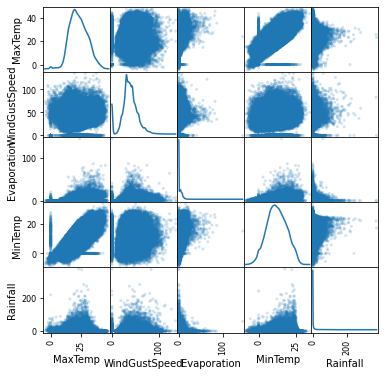

In [74]:
#scattermatrix

from pandas.plotting import scatter_matrix
df = pd.DataFrame(weather, columns = ['MaxTemp', 'WindGustSpeed', 'Evaporation', 'MinTemp', 'Rainfall'])
scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDA76A93C8>,
      dtype=object)

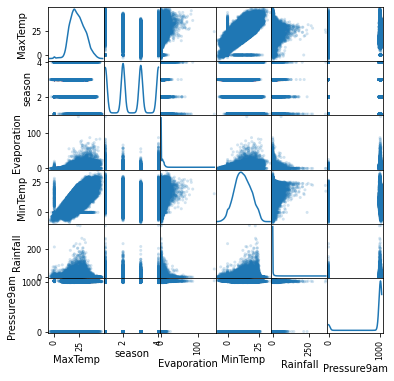

In [75]:
#scattermatrix

from pandas.plotting import scatter_matrix
dfsc = pd.DataFrame(weather, columns = ['MaxTemp', 'season', 'Evaporation', 'MinTemp', 'Rainfall','Pressure9am'])
scatter_matrix(dfsc, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

In [76]:
# Check out index
weather.index


RangeIndex(start=0, stop=142193, step=1)

In [77]:
weather.columns

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude', 'Year',
       'Month', 'State', 'season'],
      dtype='object')

In [78]:
# Set new index
#df.set_index(pd.DatetimeIndex(df['date']), inplace=True)

In [79]:
#set more than one index
#df.set_index(['date', 'B'], inplace=True)

In [80]:
# Import pyplot, figures inline, set style, plot pairplot
#import matplotlib.pyplot as plt
#%matplotlib inline
#sns.set()
#sns.pairplot(week[42], hue='MaxTemp');

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

D:\PythonData\Anacondas\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have varia

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002BD45C8F828> (for post_execute):


KeyboardInterrupt: 

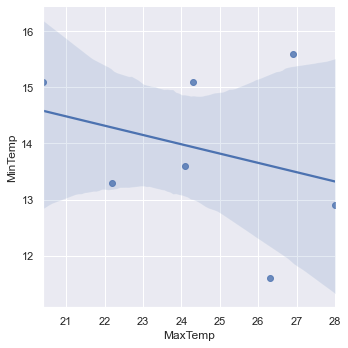

In [81]:
import seaborn as sns; sns.set(color_codes=True)
dw = week[4]
g = sns.lmplot(x="MaxTemp", y="MinTemp", data=week[4])

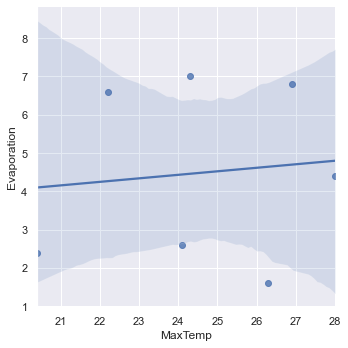

In [82]:
dw = week[4]
g = sns.lmplot(x="MaxTemp", y="Evaporation", data=week[4])

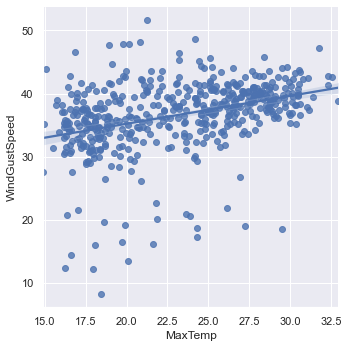

In [83]:
dw = weather.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['MaxTemp', 'WindGustSpeed']].mean().reset_index().sort_values('acq_date')
g = sns.lmplot(x="MaxTemp", y="WindGustSpeed", data=dw)

In [84]:
dfT = weather.groupby('MaxTemp').mean()

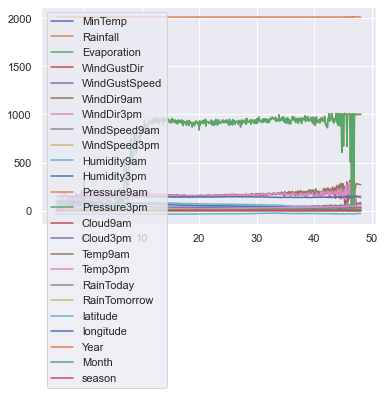

In [85]:
plt.plot(dfT)
plt.legend(dfT.keys())#plt.legend dokumentation anschaun

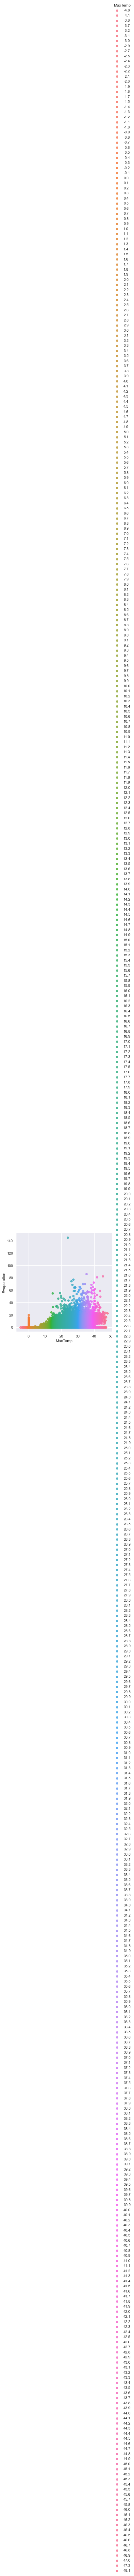

In [86]:
dfTE = sns.lmplot(x='MaxTemp', y='Evaporation', hue='MaxTemp', data=weather)
#subplot: dfTT = sns.lmplot(x="MaxTemp", y='longitude', hue="MaxTemp", data=weather)

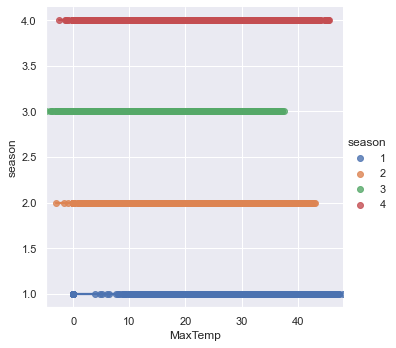

In [87]:
dfTSW = sns.lmplot(x='MaxTemp', y='season', hue='season', data=weather)
#subplot: dfTT = sns.lmplot(x="MaxTemp", y='longitude', hue="MaxTemp", data=weather)

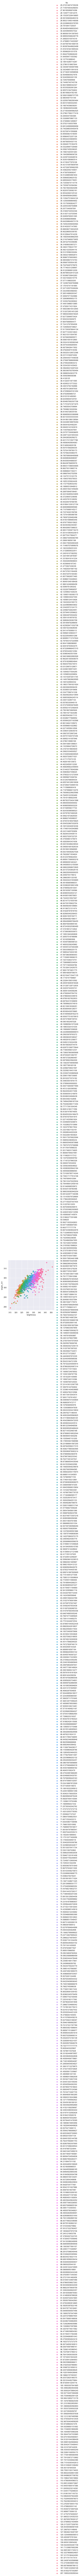

In [88]:
m6sel = m6.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['brightness', 'bright_t31', 'frp']].mean().reset_index().sort_values('acq_date')
dfTSM6 = sns.lmplot(x='brightness', y='bright_t31', hue='frp', data=m6sel)

In [ ]:
m6selS = m6.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['brightness', 'bright_t31', 'season']].mean().reset_index().sort_values('acq_date')
dfTSM6S = sns.lmplot(x='brightness', y='bright_t31', hue='season', data=m6selS)

In [ ]:
m6.keys()

In [ ]:
v1sel = v1.groupby([pd.Grouper(key='acq_date', freq='W-MON')])[['bright_ti5', 'bright_ti4', 'season']].mean().reset_index().sort_values('acq_date')
dfTSV1 = sns.lmplot(x='bright_ti5', y='bright_ti4', hue='season', data=v1sel)

In [ ]:
weather.keys()

In [ ]:
import plotly.express as px

df = weather
fig = px.parallel_categories(df)

fig.show()

In [ ]:
plt.scatter(x=weather['MaxTemp'], y=weather['Rainfall'], c=weather['season'])
plt.legend(weather.season.unique())

In [ ]:
weather.MaxTemp.max()

In [ ]:
df = week[42]
px.scatter_matrix(week[42])


In [ ]:
plt.scatter(x=weather['MaxTemp'], y=weather['Evaporation'], c=weather['Cloud9am'])

In [ ]:
#trend lines
plt.scatter(week[0], x='MaxTemp', y='Rainfall', color='Cloud9am', trendline='Evaporation', facet_col='Cloud3pm')

In [ ]:
px.bar(weeks[42], x='acq_date', y='MaxTemp')

In [ ]:
px.density_heatmap(weather, x="MaxTemp", y="Evaporation")

In [ ]:
figweek = px.scatter_matrix(week[42])
figweek.show(figsize=(8,6))


In [ ]:
figweek.show()

In [ ]:
corrmat = weather[['Rainfall', 'MaxTemp', 'season']].corr()
plt.matshow(corrmat)

In [ ]:
corrmatw = weather[['Rainfall', 'MaxTemp', 'MinTemp','Evaporation']].corr()
plt.matshow(corrmatw)

In [ ]:
corrmatwfull = weather.corr()
plt.matshow(corrmatwfull)

In [ ]:
corrmatm6 = m6.corr()
plt.matshow(corrmatm6)

In [ ]:
corrmatm6b = m6[['brightness', 'bright_t31', 'frp','confidence']].corr()
plt.matshow(corrmatm6b)

In [ ]:
corrmatv1b = v1[['bright_ti4', 'bright_ti5', 'frp','confidence']].corr()
plt.matshow(corrmatv1b)

In [ ]:
corrmatr = rain.corr()
plt.matshow(corrmatr)

In [ ]:
rain.keys()

In [ ]:
WA = weather[weather.Location == 'Wagga Wagga'][['MaxTemp', 'MinTemp','acq_date']]

In [ ]:
plt.plot(WA.set_index('acq_date'))

In [ ]:
def year_month(df):
    year = np.array([(d.year, d.month) for d in df['acq_date']])
    df['Year'],df['Month'] = year.T 
    return df

In [ ]:
rain= year_month(rain)

In [ ]:
nrtv1= year_month(nrtv1)

In [ ]:
nrtm6= year_month(nrtm6)

In [ ]:
v1= year_month(v1)

In [ ]:
m6.acq_date.max()

In [ ]:
v1.acq_date.max()

In [ ]:
rain.acq_date.max()

In [ ]:
weather.acq_date.max()

In [ ]:
nrtm6.acq_date.max()

In [ ]:
nrtv1.acq_date.max()

In [ ]:
m6.confidence.corr(m6.bright_t31)

In [ ]:
m6.confidence.corr(m6.brightness)

In [ ]:
m6.brightness.corr(m6.bright_t31)

In [ ]:
m6.frp.corr(m6.confidence)

In [ ]:
m6.frp.corr(m6.brightness)

In [ ]:
m6.frp.corr(m6.Month)

In [ ]:
m6.frp.corr(m6.bright_t31)

In [ ]:
m6.track.corr(m6.scan)

In [ ]:
m6.keys()

In [ ]:
weather.WindGustDir.unique()

In [ ]:
weather.RainTomorrow.unique()

In [ ]:
weather

In [ ]:
mdate = m6.acq_date.unique()

In [ ]:
wdate = weather.acq_date.unique()

In [ ]:
wdate

In [ ]:
mdate

In [ ]:
m6_date_sel = m6[(m6.acq_date >= weather.acq_date.min()) & (m6.acq_date <= weather.acq_date.max())]

In [ ]:
m6_date_sel

In [ ]:
weather.acq_date.min()

In [ ]:
weather.shape

In [ ]:
m6.shape

In [ ]:
weather.acq_date.nunique() # in weather missing some days

In [ ]:
m6_date_sel.acq_date.nunique()

In [ ]:
m6_date_sel.acq_date.describe()

In [ ]:
mdate = m6_date_sel.acq_date.unique()
wdate = weather.acq_date.unique()

In [ ]:
bla = np.array([mdate[i] in wdate for i in range(len(mdate))])

In [ ]:
len(bla)

In [ ]:
bla = np.array(bla)

In [ ]:
np.unique(bla)

In [ ]:
weather.acq_date.min()

In [ ]:
m6_date_sel.acq_date.min()

In [ ]:
def reverse_filling(m6_date_sel, m6):
    acq_date2 = np.bla()
    
    for i in m6.acq_date.unique():
        acq_date2[m6.acq_date == i] = bla[bla.acq_date==i].acq_date2

    m6['acq_date'] = acq_date2
    
    return m6

In [ ]:
reverse_filling(m6_date_sel, m6)

In [ ]:
for column in weather.columns:
    print('Statistic for ', column)
    print(weather[column].describe())
    print('---------------------')

In [ ]:
correlation_matrix = weather.corr()

In [ ]:
#correlation_matrix2 = week[42]corrwith(week[43])

In [ ]:
#fig = go.Figure(data=weather.Heatmap(x=correlation_matrix.columns, y=correlation_matrix.columns,z=correlation_matrix))
#fig.show()

In [ ]:
sel_m6 = timeselect(m6, freq = 'M', fct = 'mean', columns = ['frp','brightness', 'bright_t31'])
sel_weat = timeselect(weather, freq = 'M', fct = 'mean', columns = ['Pressure3pm','MaxTemp', 'Pressure9am'])

In [ ]:
c = sel_m6[(sel_m6.acq_date >= sel_weat.acq_date.min()) & (sel_m6.acq_date <= sel_weat.acq_date.max())]

In [ ]:
fig = plt.scatter(x=c.frp, y=sel_weat.MaxTemp, c=c.frp)
plt.colorbar()

In [ ]:
fig = plt.scatter(x=c.brightness, y=sel_weat.MaxTemp, c=c.frp)
plt.colorbar()

In [ ]:
fig = plt.scatter(x=c.bright_t31, y=sel_weat.MaxTemp, c=c.frp)
plt.colorbar()

In [ ]:
bli = m6[(m6.State == 'NT') & (m6.season == 2)]

In [ ]:
stra = weather[(weather.State == 'NT') & (weather.season == 2)]

In [ ]:
sel_m6 = timeselect(bli, freq = 'M', fct = 'mean', columns = ['frp','brightness', 'bright_t31'])

In [ ]:
sel_weat = timeselect(stra, freq = 'M', fct = 'mean', columns = ['Pressure3pm','MaxTemp', 'Pressure9am'])

In [ ]:
c = sel_m6[(sel_m6.acq_date >= sel_weat.acq_date.min()) & (sel_m6.acq_date <= sel_weat.acq_date.max())]

In [ ]:
plt.scatter(x=c.brightness, y=sel_weat.MaxTemp, c=c.frp)
plt.colorbar()

In [ ]:
stra

In [ ]:
bli

In [ ]:
weather.State.unique()

In [ ]:
m6.State.unique()

In [ ]:
m6.keys()

'Überschrift X'

In [ ]:
m6.info()

In [ ]:
pm6 = m6[m6.Year > 2018]

In [ ]:
#ML Librarys
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection

In [ ]:
categorical_columns = ['State']
m6['State'] = m6['State'].astype('category')

In [ ]:
m6p = pd.get_dummies(m6, drop_first=True)

In [ ]:
X = np.array(m6p.drop(['confidence','acq_date'], axis=1))
y = np.array(m6p.confidence)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#regr = RandomForestRegressor()
#regr.fit(X_train, y_train)

In [ ]:
#y_pred = regr.predict(X_test)

In [ ]:
from sklearn import linear_model
from sklearn import datasets


_, _, coefs = linear_model.lars_path(X_train, y_train, method='lar', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LARS Path')
plt.axis('tight')
plt.show()

In [ ]:
_, _, coefsb = linear_model.lars_path(X_train, y_train, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefsb.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [ ]:
np.shape(X)

In [ ]:
np.shape(y)

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import time

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

In [ ]:
from scipy import stats
from sklearn.linear_model import ARDRegression, LinearRegression

# Fit the ARD Regression
clf = ARDRegression(compute_score=True)
clf.fit(X_train, y_train)

ols = LinearRegression()
ols.fit(X_train, y_train)

# #############################################################################


In [ ]:
# Plot the true weights, the estimated weights, the histogram of the
# weights, and predictions with standard deviations
n_features = X.shape[1]
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='darkblue', linestyle='-', linewidth=2,
         label="ARD estimate")
plt.plot(ols.coef_, color='yellowgreen', linestyle=':', linewidth=2,
         label="OLS estimate")
#plt.plot(w, color='orange', linestyle='-', linewidth=2, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=1)

#plt.figure(figsize=(6, 5))
#plt.title("Histogram of the weights")
#plt.hist(clf.coef_, bins=n_features, color='navy', log=True)
#plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
#            color='gold', marker='o', label="Relevant features")
#plt.ylabel("Features")
#plt.xlabel("Values of the weights")
#plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=1)
clf_poly = ARDRegression(threshold_lambda=1e5)
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial ARD", linewidth=2)
plt.plot(X_plot, y_plot, color='gold', linewidth=2,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# plot the samples
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
#ax = plt.gca()
#xlim = ax.get_xlim()
#ylim = ax.get_ylim()

# create grid to evaluate model
#xx = np.linspace(xlim[0], xlim[1], 30)
#yy = np.linspace(ylim[0], ylim[1], 30)
#YY, XX = np.meshgrid(yy, xx)
#xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
#Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
#a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
#Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
#b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])
#
#plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           #loc="upper right")
#plt.show()

In [ ]:
#SVM Unvbalanced classes
#from sklearn import svm

# fit the model and get the separating hyperplane
#clf = svm.SVC(kernel='linear', C=1.0)
#clf.fit(X_train, y_train)

# fit the model and get the separating hyperplane using weighted classes
#wclf = svm.SVC(kernel='linear', class_weight={1: 10})
#wclf.fit(X_train, y_train)